# Visualization Exercise
In this exercise, you will visualize the famous digits dataset, which includes thousands of scanned, handwritten digits and the label of the actual number. 

Read more about this dataset [here](https://en.wikipedia.org/wiki/MNIST_database)

0


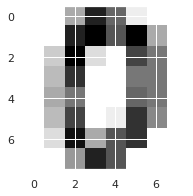

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
print(digits.target[0])
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
# Here, add code to convert the data to a 2-dimensional matrix; 
# This is necessary to input the data to the dimensionality reduction algorithms we are considering. 
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 64)


### Part 2: Transform the data using PCA 

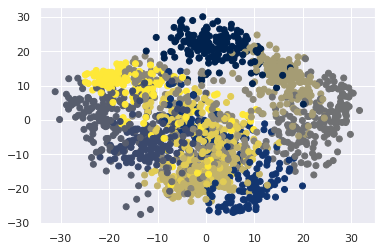

In [ ]:
# Here, add code to visualize the data using PCA.
# Use either 2 components and a standard scatter plot, or 3 with mplot3d
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_out = pca.fit_transform(data)
plt.scatter(pca_out[:,0],pca_out[:,1],c=digits.target,cmap='cividis')

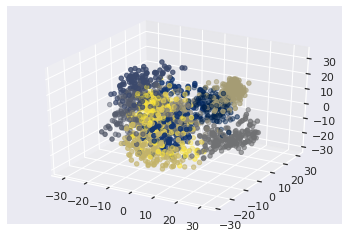

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
pca = PCA(n_components=3)
pca_out = pca.fit_transform(data)
ax.scatter3D(pca_out[:,0],pca_out[:,1], pca_out[:, 2],c=digits.target,cmap='cividis')

### Part 2: MDS
Use classical MDS to reduce the data to dimensionality of the digits data. 

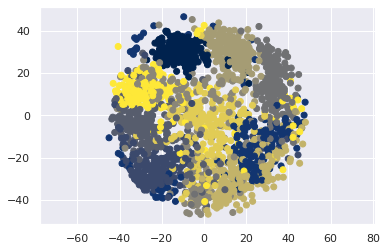

In [ ]:
# Here, add code to implement MDS and reduce the dimensionality to 2-D. 
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='euclidean', random_state=1)
out = model.fit_transform(data)
plt.scatter(out[:, 0], out[:, 1], c=digits.target,cmap='cividis')
plt.axis('equal');

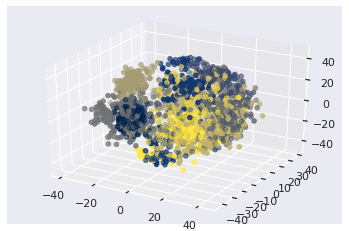

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
model = MDS(n_components=3, dissimilarity='euclidean', random_state=1)
out = model.fit_transform(data)
ax.scatter3D(out[:,0],out[:,1], out[:, 2],c=digits.target,cmap='cividis')

### Part 3: Use an alternative distance metric 
Use a different distance metric, from the package from `sklearn.metrics` described [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html). 

Talk about what you would expect the alternative distance matrix to do to the data - does it behave as you expect? 

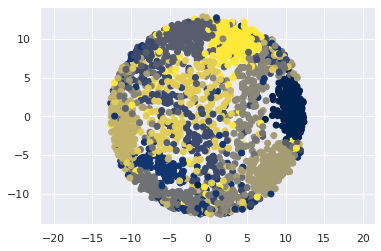

In [ ]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('chebyshev')
D = dist.pairwise(data)
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], c=digits.target,cmap='cividis')
plt.axis('equal');

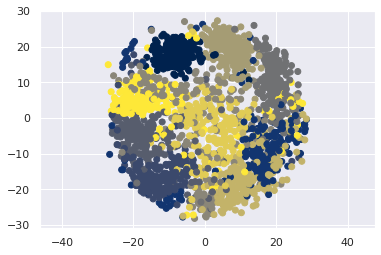

In [ ]:

dist = DistanceMetric.get_metric('minkowski', p=3)
D = dist.pairwise(data)
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], c=digits.target,cmap='cividis')
plt.axis('equal');

### Part 4: t-SNE 
Run t-SNE on your data. 

(-60.48742046356201, 72.57902278900147, -57.79324722290039, 69.6320915222168)

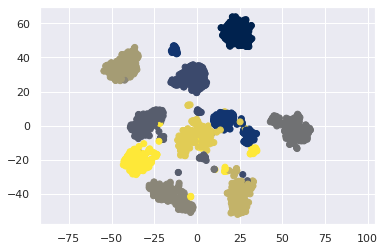

In [ ]:
from sklearn.manifold import TSNE
model = TSNE( n_components=2,perplexity=30)
out = model.fit_transform(data)
plt.scatter(out[:, 0], out[:, 1], c=digits.target,cmap='cividis')
plt.axis('equal');

### Part 5: Change perplexity of t-SNE 
Change the perplexity of the t-SNE algorithm; what do you expect to see change about the solution? What do you see? 

Experiment with changing another hyperparameter as well. Why does this work? 

(-102.64037818908692,
 111.70178718566895,
 -105.85792922973633,
 113.49695205688477)

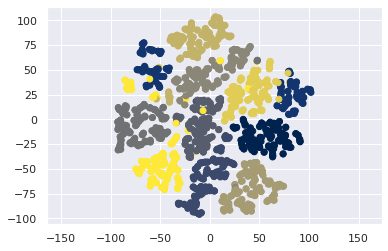

In [ ]:
from sklearn.manifold import TSNE
model = TSNE( n_components=2,perplexity=3)
out = model.fit_transform(data)
plt.scatter(out[:, 0], out[:, 1], c=digits.target,cmap='cividis')
plt.axis('equal');